In [1]:
from results.summarize_results_in_db import collect_postprocessed_results, extract_plot_data_baseline, plot_data_baseline_from_website, plot_data_baseline_postprocessed
from dcase2020.config import experiments_path, mongo_connection_string
from dcase2020.secret_config import mongo_password
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



2020-06-12 09:00:51,350 [20196] WARNING  py.warnings:110: [JupyterRequire] C:\Users\patri\miniconda3\envs\py37-dcase\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit

2020-06-12 09:00:51,352 [20196] WARNING  py.warnings:110: [JupyterRequire] C:\Users\patri\miniconda3\envs\py37-dcase\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit



In [2]:
def plot(results, y_metric="rocauc", outpath=None):
    plt.figure(figsize=(20,10))
    sns.set(font_scale=2)
    with sns.color_palette("hls", 7):
        g = sns.barplot(x="machine_type_id", y=y_metric, hue="run_id",data=results)
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.ylabel("ROC")
    plt.tight_layout()
    plt.legend(loc='lower left')
    if outpath is not None:
        plt.savefig(outpath)
    plt.show()

In [3]:
mongo_db_uri = mongo_connection_string.format(
    mongo_password)

# run_ids = [413, 378, 395, 422]
run_ids = [413, 378, 395]
print(run_ids)

[413, 378, 395]


In [20]:
db_name='dcase2020_task2_flows_grid'
results = collect_postprocessed_results(experiments_path, db_name, run_ids, overwrite=False)

69
69


In [21]:
# baseline vs. flow
plot_data_b = extract_plot_data_baseline(mongo_db_uri, aggregate=False)
plot_data_b['machine_type_id'] = 'dev/' + plot_data_b['machine_type'] + '/test_' + plot_data_b['machine_id']
plot_data_b['run_id'] = 'Baseline (Ours)'
plot_data_b['rocauc'] = plot_data_b['rocauc'].astype('float') / 100
plot_data_b['p_rocauc'] = plot_data_b['p_rocauc'].astype('float') / 100

In [22]:
plot_data_baseline_pp = plot_data_baseline_postprocessed()
plot_data_baseline_pp['machine_type_id'] = 'dev/' + plot_data_baseline_pp['machine_type'] + '/test_' + plot_data_baseline_pp['machine_id']
plot_data_baseline_pp['run_id'] = 'Baseline + Postprocessing'
plot_data_baseline_pp['rocauc'] = plot_data_baseline_pp['rocauc'].astype('float') / 100

In [23]:
plot_data_b_online = plot_data_baseline_from_website()
plot_data_b_online['machine_type_id'] = 'dev/' + plot_data_b_online['machine_type'] + '/test_' + plot_data_b_online['machine_id']
plot_data_b_online['run_id'] = 'Baseline Website'
plot_data_b_online['rocauc'] = plot_data_b_online['rocauc'].astype('float') / 100

In [24]:
results = results.append(plot_data_b_online)
# results = results.append(plot_data_b)
results = results.append(plot_data_baseline_pp)

In [25]:
pd.set_option('display.max_rows', 1000)
results

,machine,machine_type_id,machine_type,machine_id,metric,rocauc,p_rocauc,run_id,ID,Class
0,dev/ToyCar/test_id_01_2020-06-11 06:46:57.0603...,dev/ToyCar/test_id_01,dev/ToyCar/test,id_01,50%,0.827922,0.665812,413,NaN,NaN
0,dev/ToyCar/test_id_02_2020-06-11 06:48:19.1738...,dev/ToyCar/test_id_02,dev/ToyCar/test,id_02,50%,0.862642,0.718088,413,NaN,NaN
0,dev/ToyCar/test_id_03_2020-06-11 06:49:41.0992...,dev/ToyCar/test_id_03,dev/ToyCar/test,id_03,50%,0.688345,0.571060,413,NaN,NaN
0,dev/ToyCar/test_id_04_2020-06-11 06:51:03.6850...,dev/ToyCar/test_id_04,dev/ToyCar/test,id_04,50%,0.897962,0.727110,413,NaN,NaN
0,dev/ToyConveyor/test_id_01_2020-06-11 06:52:26...,dev/ToyConveyor/test_id_01,dev/ToyConveyor/test,id_01,50%,0.782125,0.640839,413,NaN,NaN
0,dev/ToyConveyor/test_id_02_2020-06-11 06:55:01...,dev/ToyConveyor/test_id_02,dev/ToyConveyor/test,id_02,50%,0.620549,0.553614,413,NaN,NaN
0,dev/ToyConveyor/test_id_03_2020-06-11 06:57:31...,dev/ToyConveyor/test_id_03,dev/ToyConveyor/test,id_03,50%,0.801252,0.634901,413,NaN,NaN
0,dev/fan/test_id_00_2020-06-11 07:00:01.465624_...,dev/fan/test_id_00,dev/fan/test,id_00,50%,0.543563,0.494892,413,NaN,NaN
0,dev/fan/test_id_02_2020-06-11 07:01:10.146406_...,dev/fan/test_id_02,dev/fan/test,id_02,50%,0.871588,0.648878,413,NaN,NaN
0,dev/fan/test_id_04_2020-06-11 07:02:13.276269_...,dev/fan/test_id_04,dev/fan/test,id_04,50%,0.661494,0.540230,413,NaN,NaN


FileNotFoundError: [Errno 2] No such file or directory: '/home/verena/experiments/dcase2020/top4.png'

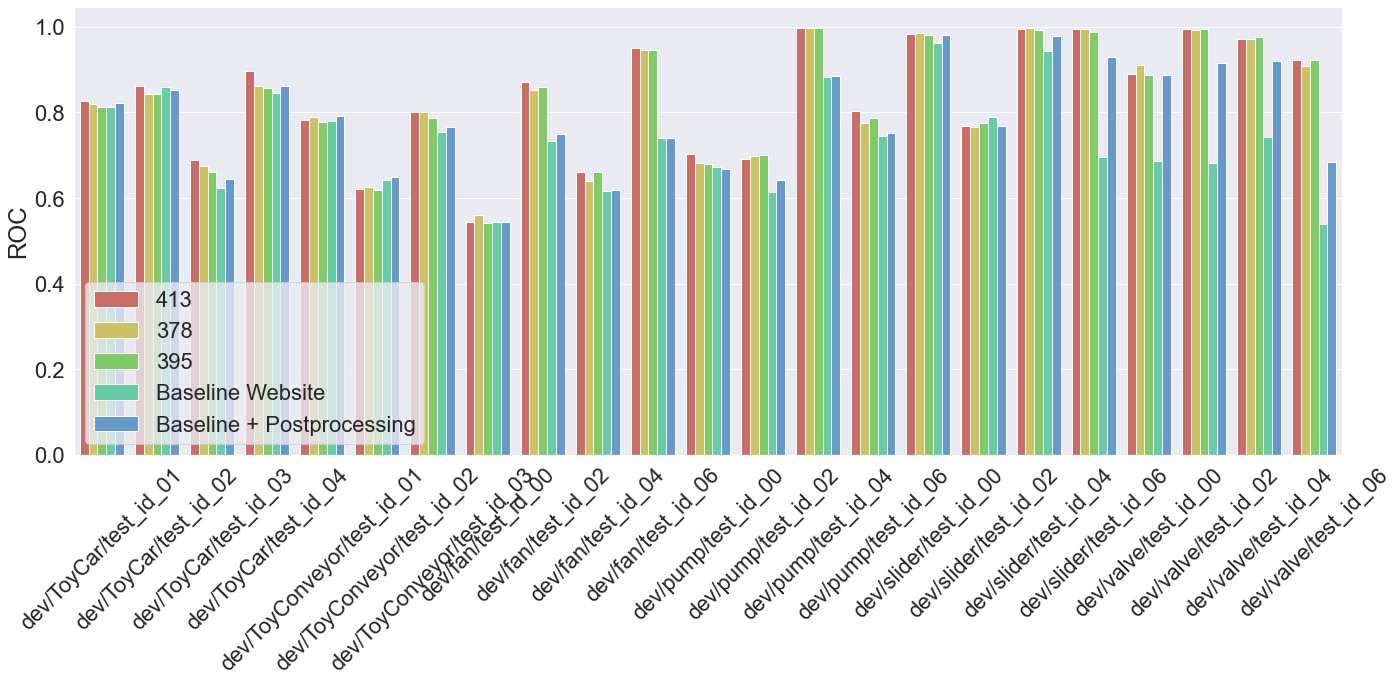

In [10]:
plot(results, outpath='/home/verena/experiments/dcase2020/top4.png')

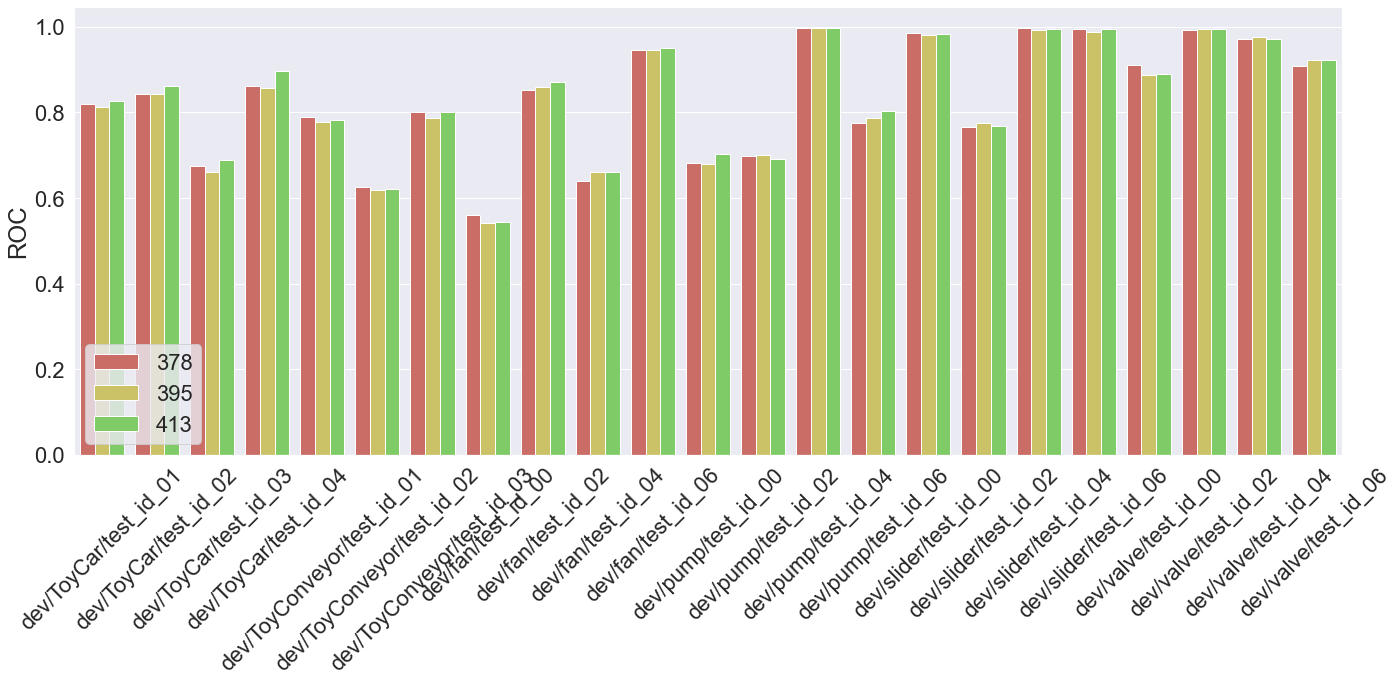

In [19]:
plot(results)

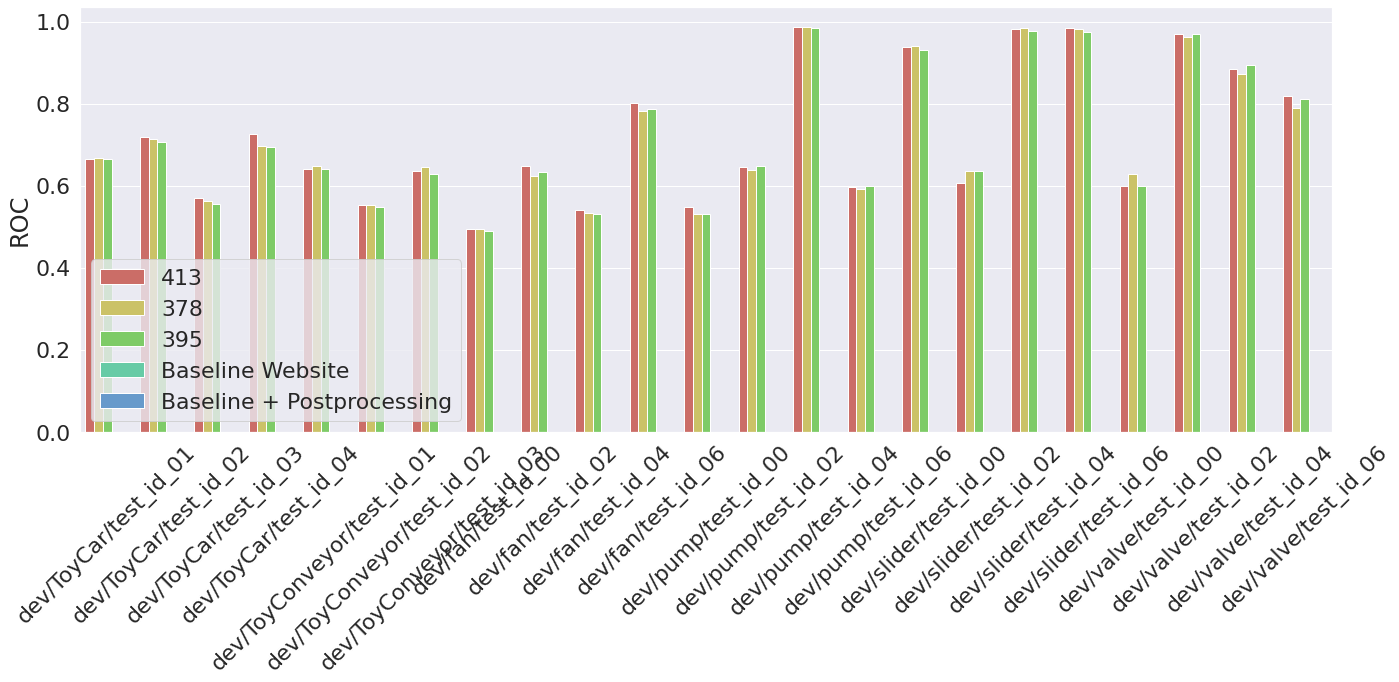

In [23]:
plot(results, "p_rocauc", outpath='/home/verena/experiments/dcase2020/top4_proc.png')


In [37]:
results.reset_index(drop=True)
results.groupby(['run_id', 'machine_type', 'metric', ]).mean()


rocauc  p_rocauc
run_id machine_type         metric                    
378    dev/ToyCar/test      50%     0.799863  0.660545
       dev/ToyConveyor/test 50%     0.738731  0.615885
       dev/fan/test         50%     0.750044  0.608655
       dev/pump/test        50%     0.788287  0.687257
       dev/slider/test      std     0.935665  0.886507
       dev/valve/test       std     0.945605  0.813702
395    dev/ToyCar/test      50%     0.793801  0.655352
       dev/ToyConveyor/test 50%     0.728108  0.605999
       dev/fan/test         50%     0.752283  0.611080
       dev/pump/test        50%     0.791333  0.690939
       dev/slider/test      std     0.934693  0.880002
       dev/valve/test       std     0.944912  0.819011
413    dev/ToyCar/test      50%     0.819218  0.670517
       dev/ToyConveyor/test 50%     0.734642  0.609785
       dev/fan/test         50%     0.756917  0.621284
       dev/pump/test        50%     0.798405  0.694811
       dev/slider/test      std     0.935531  0.877563
       dev/valve/test       std     0.945001  0.818573